In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
df = pd.read_csv("height.csv")
df

,Age,Height
0,10,138
1,11,138
2,12,138
3,13,139
4,14,139
...,...,...
66,76,204
67,77,205
68,78,206
69,79,207


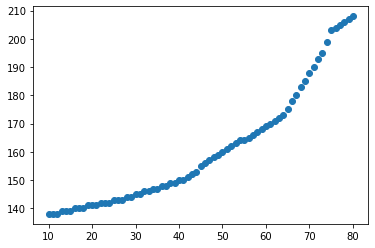

In [5]:
plt.scatter(df.Age,df.Height)

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df[["Age"]].values,df.Height.values,test_size=0.3,random_state=10)

In [60]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
reg.coef_

array([0.99856892])

In [14]:
reg.intercept_

116.27172200107096

In [61]:
reg.predict(x_test)

array([161.20732346, 129.25311798, 147.22735856, 164.20303023,
       128.25454906, 132.24882474, 158.2116167 , 165.20159915,
       172.1915816 , 176.18585728, 194.16009787, 152.22020317,
       130.2516869 , 175.18728836, 163.20446131, 145.23022072,
       146.22878964, 174.18871944, 143.23308288, 160.20875454,
       133.24739366, 184.17440866])

In [62]:
reg.score(x_train,y_train)

0.9074653113484452

In [63]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [65]:
a = reg.predict(x_test)
a

array([156., 138., 146., 156., 138., 139., 150., 160., 164., 170., 205.,
       147., 139., 166., 156., 144., 144., 166., 143., 152., 140., 180.])

In [66]:
reg.score(x_train,y_train)

1.0

In [67]:
x_test

array([[45],
       [13],
       [31],
       [48],
       [12],
       [16],
       [42],
       [49],
       [56],
       [60],
       [78],
       [36],
       [14],
       [59],
       [47],
       [29],
       [30],
       [58],
       [27],
       [44],
       [17],
       [68]], dtype=int64)

In [68]:
from sklearn.metrics import confusion_matrix
b = confusion_matrix(a,y_test)
b

array([[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

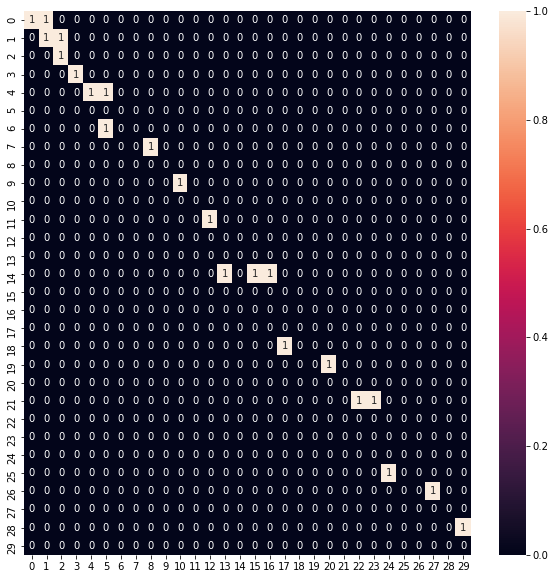

In [69]:
import seaborn as sn
plt.figure(figsize=[10,10])
sn.heatmap(b,annot=True)

In [71]:
from sklearn.metrics import r2_score
test = r2_score(y_test,a)
test

0.9946623673418277

In [70]:
max(x_train)

array([80], dtype=int64)

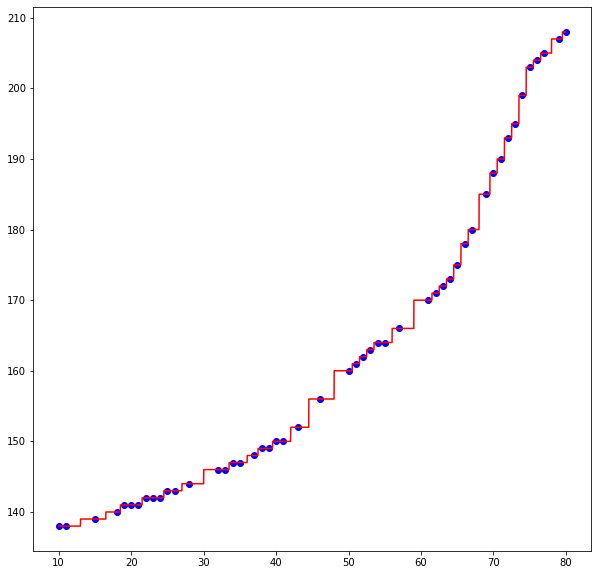

In [82]:

plt.figure(figsize=[10,10])
x_val = np.arange(min(x_train),max(x_train),0.01)
x_val = x_val.reshape(len(x_val),1)
plt.scatter(x_train,y_train,color="blue")
plt.plot(x_val,reg.predict(x_val),color='red')